In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
# https://www.youtube.com/watch?v=RHGiXPuo_pI ; LSTMS by StatQuest

In [20]:
# Generate synthetic sequential data
sequence_length = 10
input_size = 1
hidden_size = 5

data = torch.tensor([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], dtype=torch.float32)


In [21]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
    
    def forward(self, x):
        out, (hn, cn) = self.lstm(x)
        return out, hn, cn


In [22]:
data = data.view(1, sequence_length, input_size)
hidden_states = []
cell_states = []


In [23]:
model = LSTMModel(input_size, hidden_size)
out, hn, cn = model(data)

# Extract hidden states and cell states for each time step
for i in range(sequence_length):
    hidden_states.append(hn.detach().numpy().squeeze())
    cell_states.append(cn.detach().numpy().squeeze())


hidden_states  (10, 50) [[-0.0802309  -0.04439524 -0.04609939  0.10081837  0.00328206  0.00857148
   0.03172205 -0.15848494 -0.01132706  0.01958323 -0.01328454 -0.0470976
  -0.00143477 -0.01189388 -0.04598568 -0.05881286 -0.05909851  0.01147135
  -0.0226514   0.10124074  0.04832892  0.14863431 -0.08659184 -0.03745245
   0.05854337  0.10470077  0.02864871  0.0488556   0.01743638 -0.02131809
  -0.0526065   0.01108415  0.01205777 -0.05461422  0.05765163 -0.02422749
   0.07914247  0.04037793 -0.05574465  0.13848397  0.07935665 -0.11542196
   0.14308318  0.09210957  0.00355915  0.08701542 -0.13152638  0.07908585
  -0.03585144 -0.02632635]
 [-0.0802309  -0.04439524 -0.04609939  0.10081837  0.00328206  0.00857148
   0.03172205 -0.15848494 -0.01132706  0.01958323 -0.01328454 -0.0470976
  -0.00143477 -0.01189388 -0.04598568 -0.05881286 -0.05909851  0.01147135
  -0.0226514   0.10124074  0.04832892  0.14863431 -0.08659184 -0.03745245
   0.05854337  0.10470077  0.02864871  0.0488556   0.01743638 -

/tmp/ipykernel_17182/2012030296.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


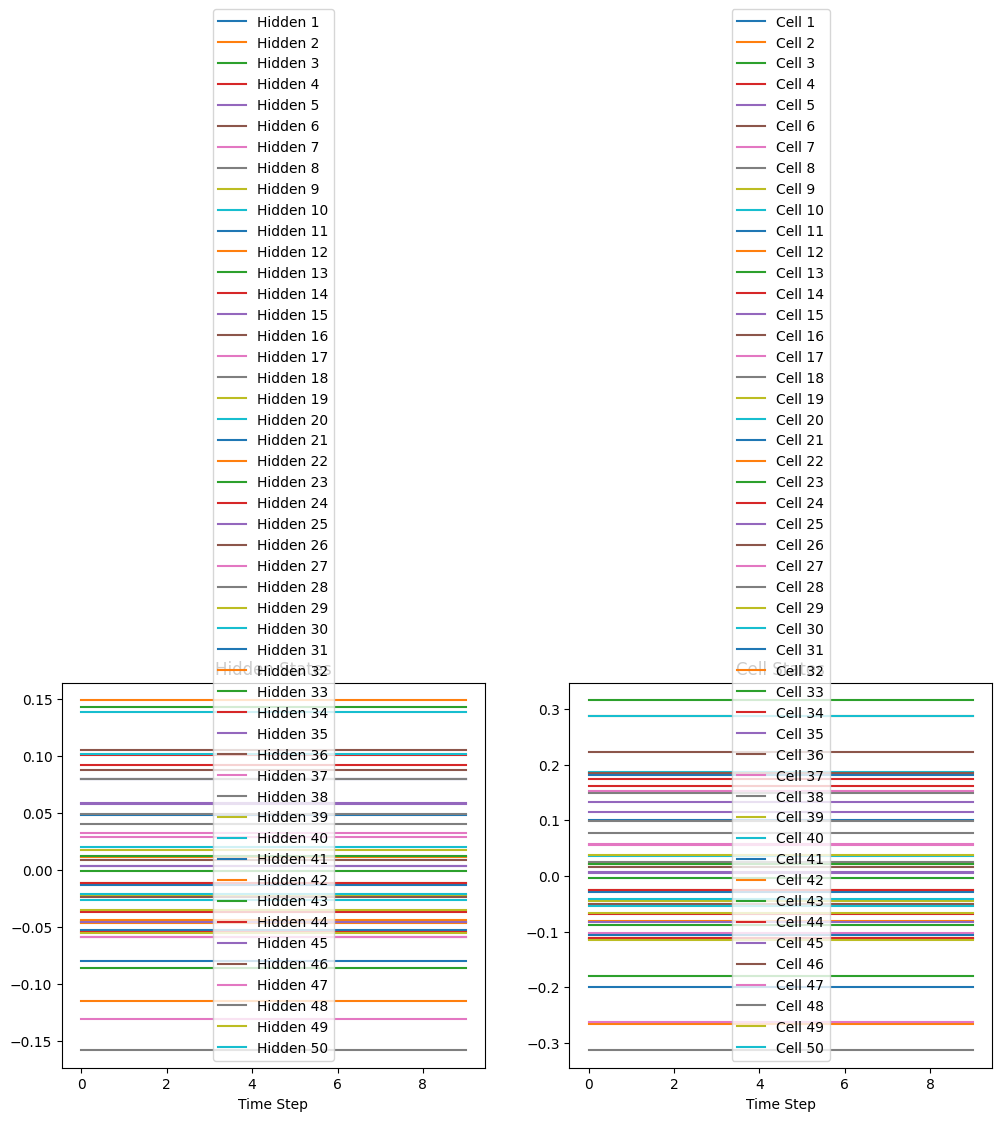

In [24]:
hidden_states = np.array(hidden_states)
print('hidden_states ', hidden_states.shape, hidden_states)
cell_states = np.array(cell_states)
print('cell_states ', cell_states.shape, cell_states)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Hidden States")
for i in range(hidden_size):
    plt.plot(hidden_states[:, i], label=f"Hidden {i+1}")
plt.xlabel("Time Step")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Cell States")
for i in range(hidden_size):
    plt.plot(cell_states[:, i], label=f"Cell {i+1}")
plt.xlabel("Time Step")
plt.legend()

plt.tight_layout()
plt.show()
